In [1]:
import os
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.1'

from algorithms.utils import restore_state_multi_agent
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# directory = '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/server_15-16/20250615_185919'
directory = '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents_to_keep/server_18-19/20250618_183531'

networks_batteries, network_rec, config, world_metadata, train_info, val_info = restore_state_multi_agent(directory)

ActorCritic ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus') ('temperature', 'soc', 'demand', 'generation', 'buying_price', 'selling_price', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm batt
RECMLP ('demands_base_battery_houses', 'demands_battery_battery_houses', 'generations_battery_houses', 'mean_demands_base', 'mean_demands_batteries', 'mean_generations', 'sin_day_of_year', 'cos_day_of_year', 'sin_seconds_of_day', 'cos_seconds_of_day', 'network_REC_plus', 'network_REC_minus')
norm rec


In [3]:
config

{'ACTIVATION': 'tanh',
 'BATTERY_ACTION_SPACE_SIZE': 1,
 'BATTERY_OBS_IS_NORMALIZABLE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': False,
  'temperature': True},
 'BATTERY_OBS_IS_SEQUENCE': {'buying_price': True,
  'cos_day_of_year': False,
  'cos_seconds_of_day': False,
  'demand': True,
  'generation': True,
  'network_REC_minus': True,
  'network_REC_plus': True,
  'selling_price': True,
  'sin_day_of_year': False,
  'sin_seconds_of_day': False,
  'soc': True,
  'temperature': True},
 'BATTERY_OBS_KEYS': ('temperature',
  'soc',
  'demand',
  'generation',
  'buying_price',
  'selling_price',
  'sin_day_of_year',
  'cos_day_of_year',
  'sin_seconds_of_day',
  'cos_seconds_of_day',
  'network_REC_plus',
  'network_REC_minus'),
 'BETA_ADAM_BATTERIES': 0.9,
 'B

In [4]:
world_metadata

WorldMetadata(world_train={'num_passive_houses': 0, 'step': 3600, 'termination': {'max_iterations': None, 'min_soh': 0.6}, 'reward': {'trading_coeff': 1, 'operational_cost_coeff': 0, 'degradation_coeff': 1, 'clip_action_coeff': 1, 'glob_coeff': 1}, 'aging_options': {'degradation': True, 'fading': False}, 'battery_observations': ['demand', 'generation', 'temperature', 'soc', 'day_of_year', 'seconds_of_day', 'selling_price', 'buying_price', 'network_REC_plus', 'network_REC_minus'], 'rec_observations': ['demands_base_battery_houses', 'demands_battery_battery_houses', 'generations_base_battery_houses', 'mean_demands_base', 'mean_demands_batteries', 'mean_generations', 'day_of_year', 'seconds_of_day', 'network_REC_plus', 'network_REC_minus'], 'use_reward_normalization': False, 'valorization_incentive_coeff': 8e-06, 'incentivizing_tariff_coeff': 8e-05, 'incentivizing_tariff_max_variable': 4e-05, 'incentivizing_tariff_baseline_variable': 0.00018, 'fairness_coeff': 0.0, 'smoothing_factor_rec_a

In [5]:
jax.tree.map(lambda x: jnp.isnan(x).any(axis=jnp.arange(1, x.ndim)), train_info)

In [6]:
jax.tree.map(lambda x: x.shape, val_info)

{'actions_batteries': (22, 43800, 5),
 'actions_rec': (22, 43800, 5),
 'balance_minus': (22, 43800),
 'balance_plus': (22, 43800),
 'buy_prices': (22, 43800, 5),
 'demands': (22, 43800, 5),
 'dones': {'REC_agent': (22, 43800),
  '__all__': (22, 43800),
  'battery_agent_0': (22, 43800),
  'battery_agent_1': (22, 43800),
  'battery_agent_2': (22, 43800),
  'battery_agent_3': (22, 43800),
  'battery_agent_4': (22, 43800)},
 'energy_to_batteries': (22, 43800, 5),
 'generations': (22, 43800, 5),
 'norm_reward': {'r_clipping': (22, 43800, 5),
  'r_deg': (22, 43800, 5),
  'r_glob': (22, 43800, 5),
  'r_op': (22, 43800, 5),
  'r_trad': (22, 43800, 5)},
 'pure_reward': {'r_clipping': (22, 43800, 5),
  'r_deg': (22, 43800, 5),
  'r_glob': (22, 43800, 5),
  'r_op': (22, 43800, 5),
  'r_trad': (22, 43800, 5)},
 'r_tot': (22, 43800, 5),
 'rec_reward': (22, 43800),
 'self_consumption': (22, 43800),
 'sell_prices': (22, 43800, 5),
 'soc': (22, 43800, 5),
 'soh': (22, 43800, 5),
 'tot_incentives': (22

In [7]:
val_info['actions_rec']

array([[[1.89667389e-01, 2.00738311e-01, 2.13019788e-01, 2.05889747e-01,
         1.90684780e-01],
        [1.90641612e-01, 2.01688021e-01, 2.13072166e-01, 2.05354601e-01,
         1.89243525e-01],
        [1.92827195e-01, 2.03518212e-01, 2.09463447e-01, 2.03504369e-01,
         1.90686777e-01],
        ...,
        [1.97061613e-01, 1.99878931e-01, 2.09687188e-01, 2.01962754e-01,
         1.91409439e-01],
        [1.95563167e-01, 2.02556193e-01, 2.09749386e-01, 2.02009231e-01,
         1.90122038e-01],
        [1.95507824e-01, 2.02751011e-01, 2.09921643e-01, 2.02085674e-01,
         1.89733863e-01]],

       [[9.87309158e-01, 2.23995972e-04, 4.60689235e-03, 7.04785902e-03,
         8.12088372e-04],
        [9.33166623e-01, 1.02333259e-03, 2.41219681e-02, 1.95333194e-02,
         2.21547391e-02],
        [1.15534645e-02, 1.58980396e-03, 3.80143076e-02, 2.14122254e-02,
         9.27430212e-01],
        ...,
        [1.14716109e-04, 1.80120184e-03, 3.47054042e-02, 4.77800425e-03,
        

In [8]:
val_info['r_tot'].shape #.sum(axis=(1, 2)).shape

(22, 43800, 5)

In [9]:
lim = config['NUM_RL_AGENTS'] if 'NUM_RL_AGENTS' in config.keys() else config['NUM_BATTERY_AGENTS']
a = val_info['r_tot'][..., :lim].sum(axis=(1, 2))
a

array([-6611.6494, -5372.3823, -4447.753 , -4191.427 , -4079.1958,
       -4012.824 , -3893.709 , -3859.6924, -3828.6575, -3780.3408,
       -3785.3435, -3834.1733, -3921.9497, -3912.2976, -3927.853 ,
       -3926.8171, -3941.6943, -3947.077 , -3963.3333, -3954.5793,
       -3960.6748, -3956.1438], dtype=float32)

In [10]:
np.argmax(a)

np.int64(9)

In [11]:
val_info['r_tot'].shape

(22, 43800, 5)

In [12]:
val_info['r_tot'][7, :].sum(axis=0)

array([ -499.71866, -1116.0549 , -1203.2748 ,  -768.73236,  -271.91705],
      dtype=float32)

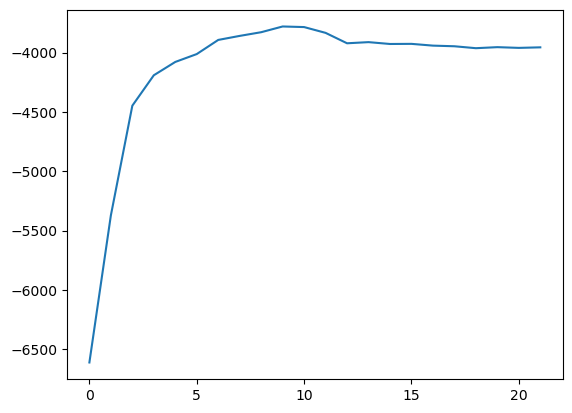

In [13]:
plt.plot(a)

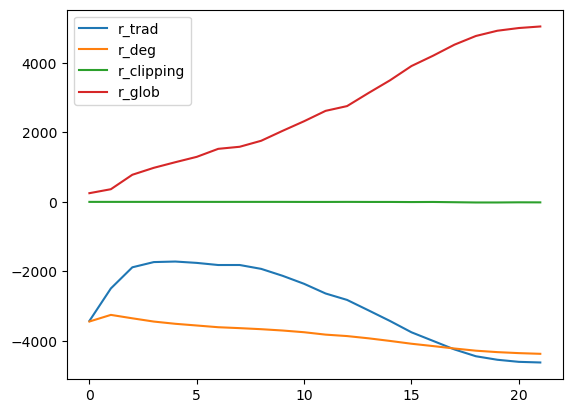

In [14]:
plt.plot(val_info['weig_reward']['r_trad'][..., :lim].sum(axis=(1, 2)), label='r_trad')
plt.plot(val_info['weig_reward']['r_deg'][..., :lim].sum(axis=(1, 2)), label='r_deg')
plt.plot(val_info['weig_reward']['r_clipping'][..., :lim].sum(axis=(1, 2)), label='r_clipping')
plt.plot(val_info['weig_reward']['r_glob'][..., :lim].sum(axis=(1, 2)), label='r_glob')
plt.legend()

In [15]:
cmap = mpl.colormaps['plasma']
n_agents = config['NUM_BATTERY_AGENTS']
colors = cmap(np.linspace(0, 1, n_agents))

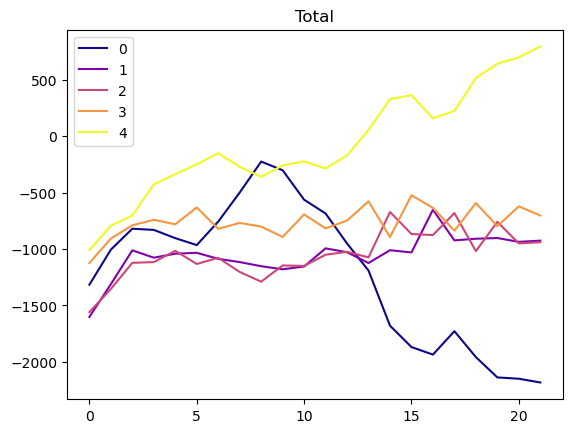

In [16]:
for i in range(n_agents):
    plt.plot(val_info['r_tot'].sum(axis=1)[:, i], color=colors[i], label=f'{i}')
    plt.title('Total')
    plt.legend()

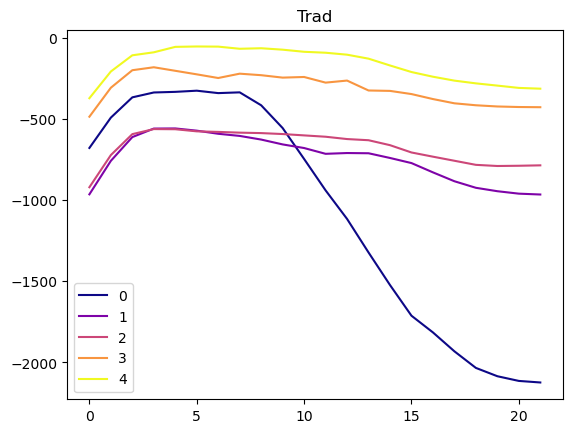

In [17]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_trad'].sum(axis=1)[:, i], color=colors[i], label=f'{i}')
    plt.title('Trad')
    plt.legend()

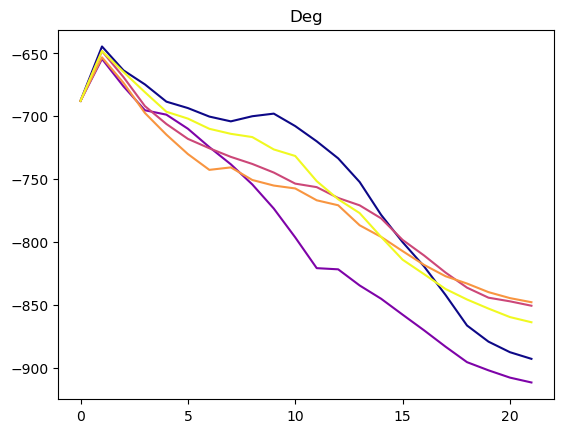

In [18]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_deg'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Deg')

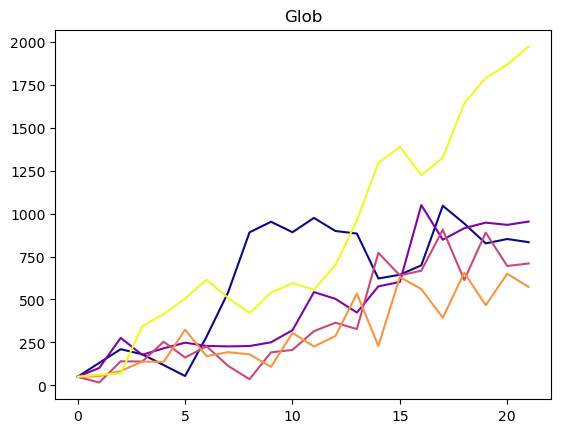

In [19]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_glob'].sum(axis=1)[:, i], color=colors[i])
    plt.title('Glob')

In [20]:
val_info['self_consumption'].sum(axis=1)

array([2.0541790e+06, 2.9978100e+06, 6.4267210e+06, 8.0642160e+06,
       9.3643300e+06, 1.0607995e+07, 1.2456285e+07, 1.2923898e+07,
       1.4319804e+07, 1.6653614e+07, 1.8919116e+07, 2.1362166e+07,
       2.2498800e+07, 2.5571524e+07, 2.8535514e+07, 3.1895344e+07,
       3.4293208e+07, 3.6887604e+07, 3.8924864e+07, 4.0154088e+07,
       4.0784496e+07, 4.1145080e+07], dtype=float32)

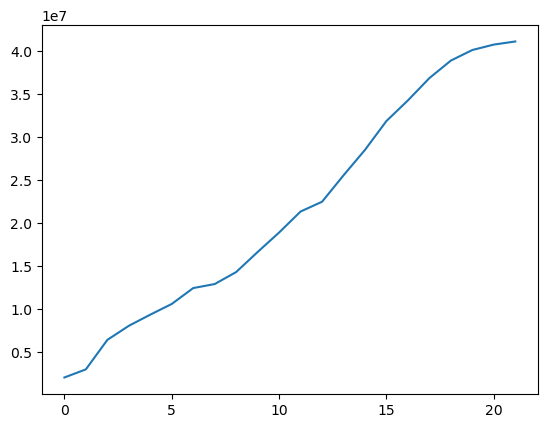

In [21]:
plt.plot(val_info['self_consumption'].sum(axis=1))

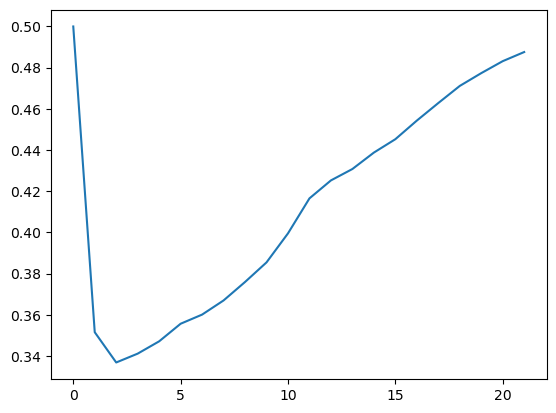

In [22]:
plt.plot(val_info['soc'][..., :lim].mean(axis=(1, 2)))

In [23]:
np.var(val_info['actions_rec'], axis=-1).shape

(22, 43800)

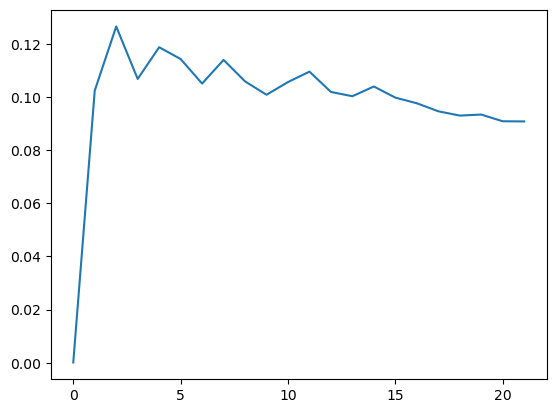

In [24]:
plt.plot(np.var(val_info['actions_rec'], axis=-1).mean(axis=1))

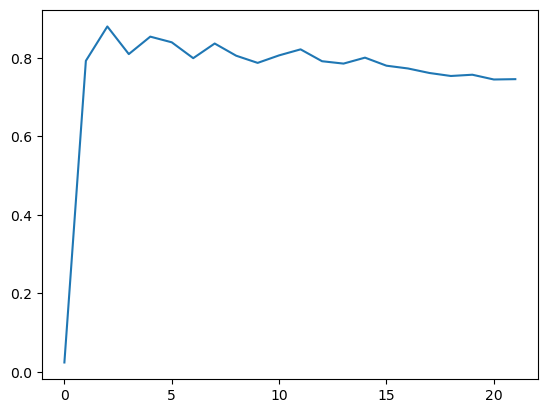

In [25]:
plt.plot(np.mean(np.max(val_info['actions_rec'], axis=-1) - np.min(val_info['actions_rec'], axis=-1), axis=1))